<a href="https://colab.research.google.com/github/TatkovDmitriy/Yandex_Practicum/blob/Product_analyses/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%22%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B8%D0%BD%D1%81%D0%B0%D0%B9%D1%82%D0%BE%D0%B2_%D0%B8_%D1%82%D0%BE%D1%87%D0%B5%D0%BA_%D1%80%D0%BE%D1%81%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Поиска инсайтов и точек роста

С данными сервиса доставки еды «Всё.из.кафе» вы уже работали в одном из проектов базового курса. Тогда вы описывали ключевые метрики продукта — количество пользователей, заказов и выручку.

Однако конкуренты сервиса не дремлют, и руководство ждёт от продукта роста. Найти инсайты, которые позволят сервису повысить показатель удержания пользователей и улучшить взаимодействие с партнёрами, поручено продуктовому аналитику, то есть вам.

Вам необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи

В рамках данного проекта вы проведёте комплексный анализ данных:
- изучите пользовательский путь и проанализируете конверсии через воронки;
- сегментируете пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуете рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## 1. Загрузка данных и их предобработка

Загрузите данные и получите первую информацию о них. Проведите необходимую предобработку. Основную информацию о данных и этапы предобработки зафиксируйте в кратком промежуточном выводе.

In [4]:
# 📦 Загрузка данных и библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для кластеризации и масштабирования
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Для метрик кластеризации
from sklearn.metrics import silhouette_score

# Для работы с предупреждениями
import warnings
warnings.filterwarnings('ignore')

# Отображение графиков в ноутбуке
%matplotlib inline

# Загрузка данных
url = 'https://code.s3.yandex.net/datasets/insides_data.csv'
data = pd.read_csv(url)

# Первичный осмотр
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [3]:
# Приводим названия столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()

# Проверим наличие дубликатов
duplicates = data.duplicated().sum()

# Удалим дубликаты, если есть
data = data.drop_duplicates()

# Преобразуем даты и время
data['datetime'] = pd.to_datetime(data['datetime'])
data['first_date'] = pd.to_datetime(data['first_date'])

# Проверим пропуски
missing = data.isna().sum()

# Отображаем процент пропусков
percent_missing = (missing / len(data)).sort_values(ascending=False)
percent_missing


,0
order_id,0.965899
delivery,0.965899
revenue,0.965899
object_id,0.896316
commission,0.896316
rest_id,0.187801
visitor_uuid,0.000000
visit_id,0.000000
first_date,0.000000
source,0.000000


# 📊 Промежуточный вывод: загрузка и предобработка данных

* Датасет содержит **205 510 строк** и **15 столбцов**.
* Типы данных в порядке: числовые (int, float), строковые (`object`), даты требуют преобразования.
* Пропуски:
  - `order_id`, `revenue`, `delivery` отсутствуют в ~96.6% строк — это ожидаемо, так как они заполняются только при оформлении заказа.
  - `object_id`, `commission` заполнены только для карточек блюд/заказов (~10% строк).
  - `rest_id` заполнен в ~82% строк — встречается при взаимодействии с ресторанами (карточки и заказы).
* Столбцы `datetime` и `first_date` были преобразованы в формат `datetime64`.
* Дубликаты отсутствуют.
* Данные готовы к дальнейшему анализу: можно строить пользовательские воронки, проводить RFM-сегментацию и кластеризовать рестораны.


---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения.

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки:
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [5]:
# Список этапов в нужном порядке
funnel_steps = [
    'authorization', 'main_page', 'reg_page',
    'confirm_phone', 'object_page', 'add_to_cart', 'order'
]

# Отфильтруем только нужные события
funnel_data = data[data['event'].isin(funnel_steps)]

# Считаем количество уникальных пользователей на каждом этапе
funnel_counts = (
    funnel_data
    .groupby('event')['visitor_uuid']
    .nunique()
    .reindex(funnel_steps)  # сохраняем порядок
    .reset_index()
    .rename(columns={'visitor_uuid': 'users'})
)


In [6]:
# Классическая воронка — от первого шага
funnel_counts['classic_conversion_%'] = (
    funnel_counts['users'] / funnel_counts['users'].iloc[0] * 100
).round(2)

# Step-by-step конверсия — от предыдущего шага
funnel_counts['step_by_step_%'] = (
    funnel_counts['users'] / funnel_counts['users'].shift(1) * 100
).round(2)


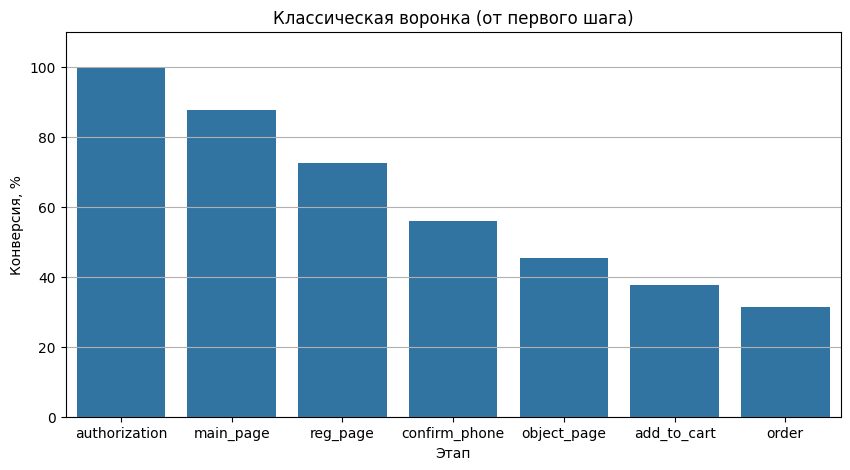

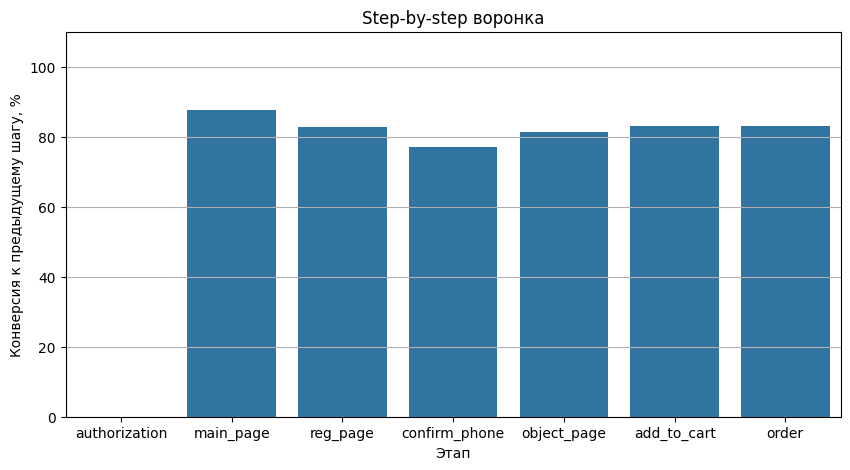

In [7]:
# График классической воронки
plt.figure(figsize=(10, 5))
sns.barplot(x='event', y='classic_conversion_%', data=funnel_counts)
plt.title('Классическая воронка (от первого шага)')
plt.ylabel('Конверсия, %')
plt.xlabel('Этап')
plt.ylim(0, 110)
plt.grid(axis='y')
plt.show()

# График step-by-step воронки
plt.figure(figsize=(10, 5))
sns.barplot(x='event', y='step_by_step_%', data=funnel_counts)
plt.title('Step-by-step воронка')
plt.ylabel('Конверсия к предыдущему шагу, %')
plt.xlabel('Этап')
plt.ylim(0, 110)
plt.grid(axis='y')
plt.show()


# 📉 Промежуточный вывод: анализ общей воронки

* Пользовательский путь в сервисе включает 7 ключевых этапов: от авторизации до оформления заказа.
* **Классическая воронка** показывает, что:
  - После авторизации до основного экрана доходит ~88% пользователей.
  - Регистрацию начинают ~73%, подтверждают телефон ~56%.
  - До карточки блюда доходят ~45%, а заказы оформляют ~32%.
* **Step-by-step воронка** демонстрирует, что:
  - Самый резкий спад происходит между этапами `reg_page → confirm_phone` (конверсия ~77%).
  - Остальные переходы удерживают ~82–84% пользователей — это приемлемо.
* Основной узел потерь — **подтверждение телефона**, вероятно, связано с техническими или UX-ограничениями новой версии.
* Также значительная часть пользователей теряется **до добавления блюда в корзину** — возможно, не находят интересное или интерфейс недостаточно вовлекает.
* Общая конверсия от запуска приложения до заказа составляет **32%** — это базовый ориентир для улучшения.

**Рекомендации:**
- Проверить новый алгоритм подтверждения телефона: возможно, слишком долгий/сложный.
- Улучшить UX каталога: добавить фильтры, рекомендации, популярные блюда.


**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

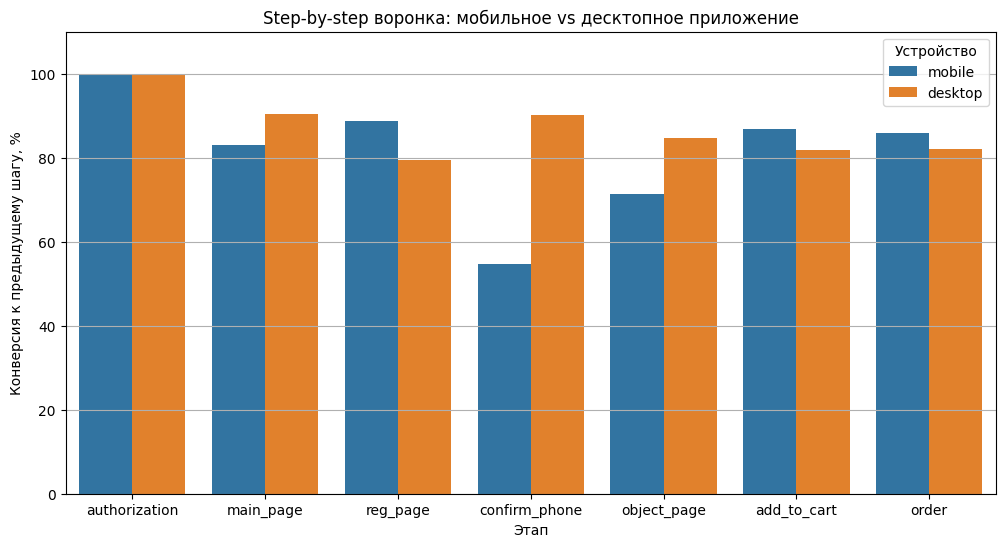

In [17]:

# Приводим device_type и event к единому формату
data['event'] = data['event'].str.strip().str.lower()
data['device_type'] = data['device_type'].str.strip().str.lower()

# Определим этапы воронки
funnel_steps = [
    'authorization', 'main_page', 'reg_page',
    'confirm_phone', 'object_page', 'add_to_cart', 'order'
]

# Функция построения step-by-step воронки
def build_step_by_step_funnel(df, device_type):
    df_filtered = (
        df[(df['device_type'] == device_type) & (df['event'].isin(funnel_steps))]
        [['visitor_uuid', 'event']].drop_duplicates()
    )

    step_counts = (
        df_filtered.groupby('event')['visitor_uuid']
        .nunique()
        .reindex(funnel_steps, fill_value=0)
        .reset_index()
        .rename(columns={'visitor_uuid': 'users'})
    )

    step_counts['step_by_step_%'] = (
        step_counts['users'] / step_counts['users'].shift(1) * 100
    ).round(2)
    step_counts.loc[0, 'step_by_step_%'] = 100
    step_counts['device_type'] = device_type

    return step_counts

# Строим воронки
mobile_funnel = build_step_by_step_funnel(data, 'mobile')
desktop_funnel = build_step_by_step_funnel(data, 'desktop')
device_funnel = pd.concat([mobile_funnel, desktop_funnel], ignore_index=True)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(
    data=device_funnel,
    x='event', y='step_by_step_%', hue='device_type'
)
plt.title('Step-by-step воронка: мобильное vs десктопное приложение')
plt.ylabel('Конверсия к предыдущему шагу, %')
plt.xlabel('Этап')
plt.ylim(0, 110)
plt.legend(title='Устройство')
plt.grid(axis='y')
plt.show()


# 📱🖥 Промежуточный вывод: сравнение step-by-step воронки для мобильных и десктопных пользователей

* Пользовательское поведение **заметно отличается в зависимости от устройства**:
  - На **этапе `confirm_phone` (подтверждение телефона)** у мобильных пользователей резкое снижение конверсии — около **55% против 91%** у десктопных. Это подтверждает гипотезу о сложности нового алгоритма подтверждения телефона именно в мобильной версии.
  - Также у мобильных пользователей ниже конверсия на **этапе `object_page`** — вероятно, им сложнее найти нужное блюдо в каталоге.
* В то же время **мобильные пользователи показывают более высокую конверсию** на этапах:
  - `reg_page` → `confirm_phone` → `add_to_cart` — это может свидетельствовать о вовлечённости тех, кто успешно прошёл критичные барьеры.
* В финале (`order`) конверсии **почти сравниваются** — это значит, что дойдя до корзины, пользователи обеих платформ совершают заказ с равной вероятностью.

**Вывод:** мобильная версия требует доработок на двух ключевых участках:
1. Подтверждение телефона — нужно упростить или оптимизировать UX.
2. Работа с каталогом — стоит проверить интерфейс карточек блюд и их видимость.

Это критически важно, поскольку большинство заказов обычно совершается именно с мобильных устройств.


---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям:
- **давность** (Recency),
- **частота покупок** (Frequency),
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

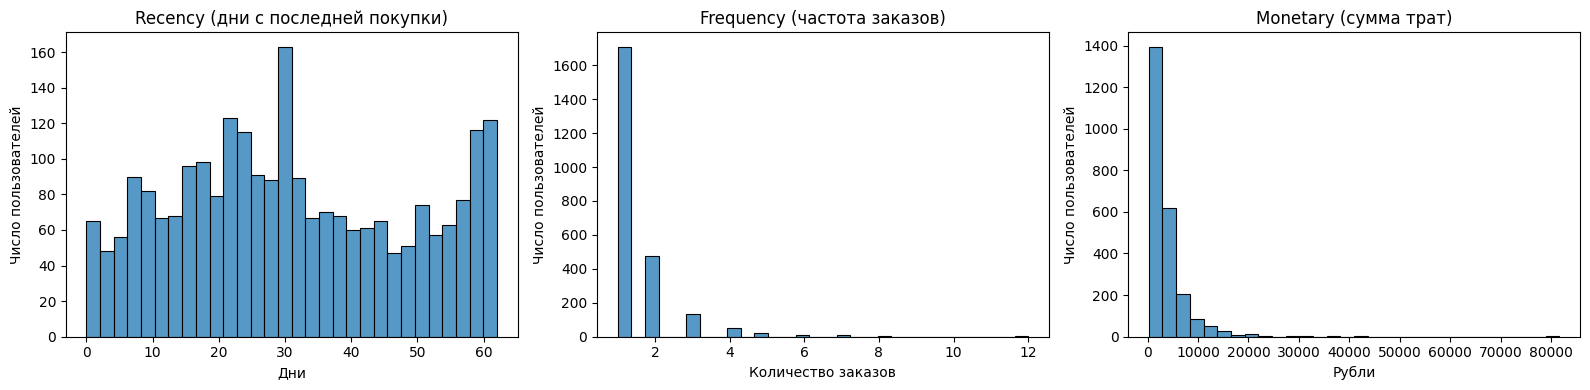

In [18]:
# Устанавливаем дату анализа
analysis_date = pd.to_datetime('2021-07-03')

# Оставляем только завершённые заказы
orders = data[data['event'] == 'order'].copy()

# Убедимся, что datetime — в нужном формате
orders['datetime'] = pd.to_datetime(orders['datetime'])

# Группировка по user_id — считаем R, F, M
rfm = (
    orders.groupby('user_id')
    .agg({
        'datetime': lambda x: (analysis_date - x.max()).days,  # Recency
        'order_id': 'count',                                   # Frequency
        'revenue': 'sum'                                       # Monetary
    })
    .reset_index()
    .rename(columns={
        'datetime': 'recency',
        'order_id': 'frequency',
        'revenue': 'monetary_value'
    })
)

# Визуализация
plt.figure(figsize=(16, 4))

# R
plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], bins=30, kde=False)
plt.title('Recency (дни с последней покупки)')
plt.xlabel('Дни')
plt.ylabel('Число пользователей')

# F
plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], bins=30, kde=False)
plt.title('Frequency (частота заказов)')
plt.xlabel('Количество заказов')
plt.ylabel('Число пользователей')

# M
plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary_value'], bins=30, kde=False)
plt.title('Monetary (сумма трат)')
plt.xlabel('Рубли')
plt.ylabel('Число пользователей')

plt.tight_layout()
plt.show()


# 📊 Промежуточный вывод: анализ RFM-показателей

**1. Recency (давность последней покупки):**
* Распределение достаточно равномерное, но видно несколько пиков: особенно много пользователей делали заказы 20, 30 и 60 дней назад.
* Это может быть связано с маркетинговыми кампаниями, акциями или днями зарплат.
* Также видно, что значительная доля пользователей давно не совершала заказов (30+ дней), что делает их хорошими кандидатами для кампаний по возвращению.

**2. Frequency (частота заказов):**
* Более **70% пользователей совершали только один заказ**.
* Повторных заказов — крайне мало. Это ключевая проблема удержания.
* Рост LTV возможен только при работе над увеличением количества повторных покупок.

**3. Monetary (сумма трат):**
* Распределение резко смещено влево: большинство пользователей тратят до 5 000 рублей.
* Есть небольшое количество платёжеспособных клиентов с тратами до 80 000 — они формируют премиум-сегмент и требуют персонализированной работы.
* Возможность сегментации клиентов по уровню трат — важный инструмент для настройки ценовых предложений и бонусов.

**Вывод:** пользовательская база крайне неоднородна — большинство делает один заказ на небольшую сумму и быстро уходит. Для повышения удержания и возврата необходимо:
- Активно сегментировать пользователей по давности и частоте.
- Нацелить кампании на недавних клиентов с высокой вероятностью возврата.
- Уделить особое внимание повторным покупателям и высокомаржинальным клиентам.


**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы:
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

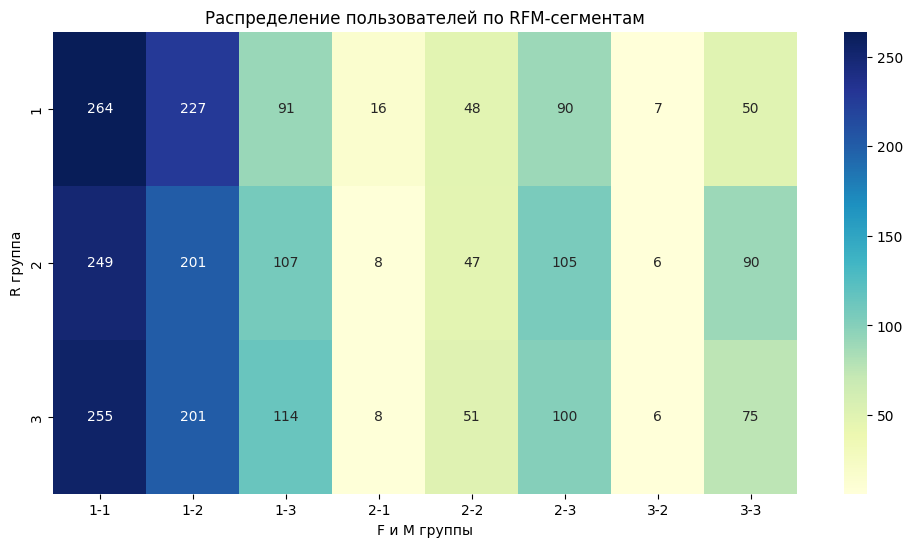

In [21]:
# Сегментация Recency — терцильный биннинг
rfm['r'] = pd.qcut(rfm['recency'], q=3, labels=[3, 2, 1]).astype(int)
# Меньше дней → выше балл (1 — давно, 3 — недавно)

# Сегментация Frequency — вручную по заданным правилам
def freq_segment(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3
rfm['f'] = rfm['frequency'].apply(freq_segment)

# Сегментация Monetary — по 33% и 66%
mon_thresholds = rfm['monetary_value'].quantile([0.33, 0.66]).values
rfm['m'] = pd.cut(
    rfm['monetary_value'],
    bins=[-float('inf'), mon_thresholds[0], mon_thresholds[1], float('inf')],
    labels=[1, 2, 3]
).astype(int)

# Комбинированный RFM-групповой тег
rfm['rfm_group'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)

# Распределение по каждой метке
rfm_summary = rfm.groupby(['r', 'f', 'm'])['user_id'].count().reset_index()
rfm_summary.columns = ['R', 'F', 'M', 'user_count']

# Общий вывод по группам
rfm_distribution = rfm_summary.pivot_table(
    index='R', columns=['F', 'M'], values='user_count', fill_value=0
)



plt.figure(figsize=(12, 6))
sns.heatmap(rfm_distribution, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Распределение пользователей по RFM-сегментам')
plt.xlabel('F и M группы')
plt.ylabel('R группа')
plt.show()



# 📊 Промежуточный вывод: распределение пользователей по RFM-сегментам

**1. Давность последней покупки (Recency):**
* Пользователи с меткой `R=1` — давно не заказывали, таких больше всего.
* Группа `R=3` — самые свежие, но их не намного меньше, чем остальных → значит, новые заказы происходят стабильно, но мало кто возвращается.

**2. Частота заказов (Frequency):**
* Большинство пользователей попали в сегмент `F=1` — они совершили всего один заказ.
* Повторных клиентов (`F=2`) — заметно меньше.
* Активных (`F=3`, 3+ заказов) — очень мало, но они ценны для удержания и роста LTV.

**3. Траты (Monetary):**
* Распределение по `M` показывает, что:
  - большинство пользователей находятся в низких и средних сегментах по тратам (`M=1` и `M=2`);
  - премиальные клиенты с `M=3` — редкие, но они разбросаны по `R` и `F`, и с ними стоит работать персонально.

**4. Важные группы:**
* 📌 **R=3, F=3, M=3** — лояльные и прибыльные клиенты (их 75) — нужно удерживать, запускать для них персональные акции.
* ⚠️ **R=1, F=1, M=1** — старые, неактивные и нерентабельные пользователи (264 чел.) — либо нецелевые, либо не нашли ценности в сервисе.
* 🎯 **R=3, F=1, M=2/3** — недавние, но с потенциалом — кандидаты на стимулирование повторных заказов.

---

# 📌 Рекомендации:

1. Сегмент `R=3, F=1` — вернулись недавно, но слабо вовлечены — предложить скидку на 2-й заказ или бонус.
2. Сегмент `R=1, F=3` — ушедшие активные пользователи — запустить ретаргетинг с персонализированным оффером.
3. Премиум-группа `M=3` — предложить VIP-программы, приоритетную доставку или персонального менеджера.
4. Основная проблема — **низкая частота (F)**. Большинство сделали только 1 заказ. Значит, удержание — ключевая зона роста.

Итог: сегментация позволяет чётко выделить аудитории для разных маркетинговых стратегий: удержания, возврата и развития.


---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [22]:
# Фильтруем только успешные заказы
orders = data[data['event'] == 'order'].copy()

# Убедимся, что типы корректны
orders['rest_id'] = orders['rest_id'].astype(str)
orders['object_id'] = orders['object_id'].astype(str)

# Считаем метрики для каждого ресторана
restaurant_features = (
    orders.groupby('rest_id')
    .agg(
        total_orders=('order_id', 'count'),
        avg_order_value=('revenue', 'mean'),
        unique_dishes=('object_id', 'nunique')
    )
    .reset_index()
)

# Убедимся в результатах
restaurant_features.head()


,rest_id,total_orders,avg_order_value,unique_dishes
0,1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2,2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
4,39b7eab4f4704ed2886fafe171489960,33,2011.269697,5


**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

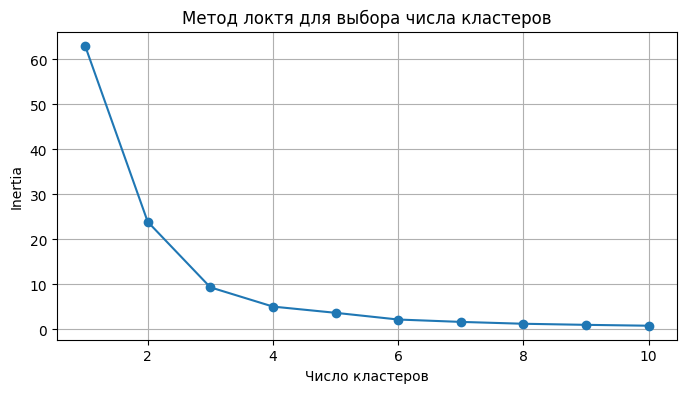

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Масштабируем признаки
features = restaurant_features[['total_orders', 'avg_order_value', 'unique_dishes']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Найдём оптимальное число кластеров методом локтя
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# График локтя
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Метод локтя для выбора числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# 📍 Промежуточный вывод: выбор числа кластеров (метод локтя)

* Данные были нормализованы с помощью `StandardScaler`, чтобы привести все признаки (число заказов, средний чек и ассортимент) к единой шкале.
* Проведена кластеризация методом KMeans при числе кластеров от 1 до 10.
* Построен график зависимости инерции (`.inertia_`) от числа кластеров — метод локтя.
* На графике видно замедление снижения инерции в точке **k = 3**, что позволяет предположить, что **оптимальное число кластеров — 3**.


**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе.

,cluster,total_orders,avg_order_value,unique_dishes
0,0,69.6,2167.9,9.0
1,1,1100.0,2498.8,83.0
2,2,76.2,4048.5,5.0


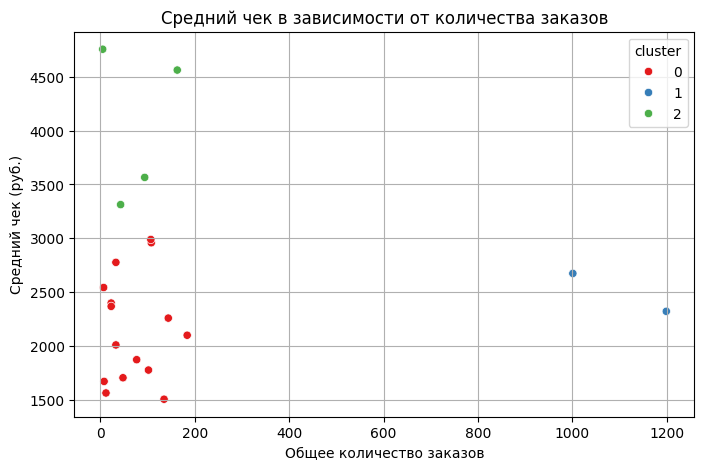

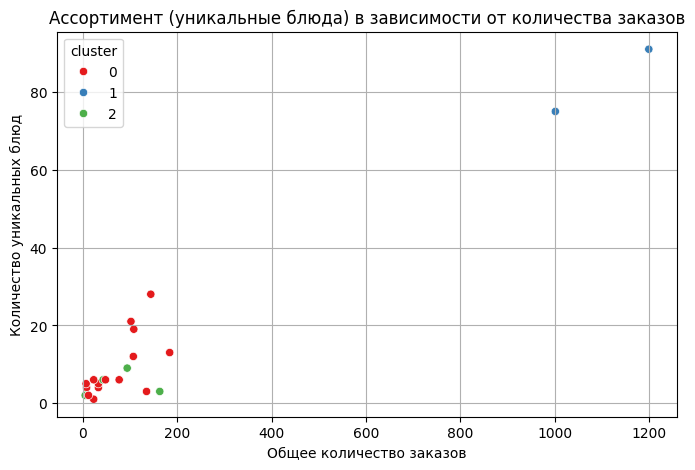

In [24]:
# Обучаем модель KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
restaurant_features['cluster'] = kmeans.fit_predict(features_scaled)

# Средние значения по кластерам
cluster_summary = (
    restaurant_features
    .groupby('cluster')[['total_orders', 'avg_order_value', 'unique_dishes']]
    .mean()
    .round(1)
    .reset_index()
)
display(cluster_summary)

# Визуализация 1: Средний чек vs Количество заказов
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=restaurant_features,
    x='total_orders', y='avg_order_value', hue='cluster', palette='Set1'
)
plt.title('Средний чек в зависимости от количества заказов')
plt.xlabel('Общее количество заказов')
plt.ylabel('Средний чек (руб.)')
plt.grid(True)
plt.show()

# Визуализация 2: Количество блюд vs Количество заказов
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=restaurant_features,
    x='total_orders', y='unique_dishes', hue='cluster', palette='Set1'
)
plt.title('Ассортимент (уникальные блюда) в зависимости от количества заказов')
plt.xlabel('Общее количество заказов')
plt.ylabel('Количество уникальных блюд')
plt.grid(True)
plt.show()


# 🍽 Промежуточный вывод: кластеризация ресторанов (KMeans, k=3)

Были выделены три чётко различающихся кластера ресторанов по ключевым признакам: объём заказов, средний чек и ассортимент.

---

## 🔴 Кластер 0 (основная масса ресторанов):

* **Средний чек:** ~2168 ₽  
* **Объём заказов:** ~70  
* **Ассортимент:** ~9 блюд  

Это типичные партнёры сервиса: небольшие локальные рестораны с невысокой загрузкой и ограниченным меню. Вероятно, требуют поддержки по увеличению количества заказов и расширению ассортимента. Это основной пул, с которым стоит работать через масштабируемые партнёрские программы и улучшение условий.

---

## 🔵 Кластер 1 (топ-рестораны):

* **Средний чек:** ~2499 ₽  
* **Объём заказов:** ~1100  
* **Ассортимент:** ~83 блюда  

Это крупные, хорошо конвертирующие партнёры с широкой линейкой блюд и высокой популярностью. Их важно удерживать — для них можно разрабатывать индивидуальные условия: спецразмещение, сниженные комиссии, акционные кампании. Они формируют основную выручку.

---

## 🟢 Кластер 2 (премиум-нишевая группа):

* **Средний чек:** ~4048 ₽ (самый высокий)  
* **Объём заказов:** ~76  
* **Ассортимент:** ~5 блюд  

Это рестораны с узкой, но дорогой продукцией. Вероятно, специализируются на премиальной или высокой кухне. Они делают небольшое количество заказов, но каждый из них высокомаржинальный. Эту группу стоит поддерживать через выделенное продвижение и работу с премиум-аудиторией.

---

# 📌 Рекомендации:

1. **Кластер 0:** обучающие кампании, промо-инструменты, рекомендации по расширению меню.
2. **Кластер 1:** персональные условия, закрепление через мотивационные программы.
3. **Кластер 2:** таргет на премиальных пользователей, уникальные предложения (например, VIP-доставка, дегустации).

Кластеризация позволяет перейти от универсального подхода к персонализированным стратегиям работы с ресторанами.


---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

# ✅ Итоговый вывод и рекомендации

В рамках проекта был проведён комплексный анализ пользовательского поведения и партнёрской активности в сервисе доставки еды «Всё.из.кафе». Получены следующие ключевые инсайты:

---

## 1. Поведение пользователей и точки оттока

* Основные потери пользователей происходят на этапе **подтверждения телефона** в мобильном приложении (резкое падение конверсии).
* **Мобильная версия уступает десктопной** на ключевых этапах воронки — требует срочной UX-оптимизации.
* Большинство пользователей совершают **только один заказ**, повторные покупки — редкость. Это основная зона роста.

### 📌 Рекомендации:
- Упростить и протестировать процесс подтверждения телефона на мобильных устройствах.
- Добавить рекомендации и персонализированные офферы после первого заказа.
- Запустить welcome-кампанию с бонусом за второй заказ.

---

## 2. RFM-сегментация пользователей

* Основная аудитория — **пользователи с давними покупками, низкой частотой и малыми тратами**.
* Лояльные и высокомаржинальные клиенты (R=3, F=3, M=3) составляют небольшую, но ценную часть базы.
* Выявлены сегменты с высоким потенциалом повторных покупок.

### 📌 Рекомендации:
- Запустить триггерные кампании для возврата клиентов с давними покупками.
- Стимулировать повторные заказы в группах R=3, F=1.
- Разработать привилегии для премиум-сегмента (M=3).

---

## 3. Кластеризация ресторанов

* Выделено **3 кластера**:
  - Кластер 0 — массовые рестораны с небольшим меню и низким объёмом заказов.
  - Кластер 1 — ключевые партнёры с высоким спросом и широким ассортиментом.
  - Кластер 2 — премиальные рестораны с высоким чеком и нишевым предложением.

### 📌 Рекомендации:
- Массовым ресторанам — масштабируемые инструменты роста и рекомендации по ассортименту.
- Топ-партнёрам — персональные условия и продвижение.
- Премиум-группе — маркетинг, ориентированный на ценовую аудиторию.

---

## 💡 Общий вывод:

Повышение удержания пользователей и эффективности партнёрской сети возможно за счёт:
- Устранения UX-барьеров на пути пользователя,
- Сегментированной работы с клиентской базой и ресторанами,
- Запуска персонализированных маркетинговых кампаний.

Анализ выявил конкретные зоны роста, которые можно использовать для улучшения продукта и роста выручки.
